In [1]:
import pandas as pd

# Load the uploaded data file
data_path = r'/Users/maryanhussein/Desktop/Math_Stats/Assesment/assessment_da25.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [2]:
# Separate the data into two groups based on the variant
group_a = data[data['Variant'] == 'A']  # Horizontal media rail
group_b = data[data['Variant'] == 'B']  # Vertical media rail

# Calculate summary statistics for each group
summary_a = group_a.describe()
summary_b = group_b.describe()

# Prepare data for visual comparison of distributions
metrics_to_compare = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Check the mean values for a quick comparison before detailed statistical testing
mean_comparison = pd.DataFrame({
    'Metric': metrics_to_compare,
    'Mean A': [group_a[metric].mean() for metric in metrics_to_compare],
    'Mean B': [group_b[metric].mean() for metric in metrics_to_compare],
})

mean_comparison


,Metric,Mean A,Mean B
0,Number of page views,4.98500,5.31700
1,GMV (in $),7.68999,9.28953
2,Number of add to cart,1.88400,2.46900
3,Clicks on media,1.49500,1.32400
4,Time on Page (sec),20.54300,20.04700


In [3]:
from scipy.stats import ttest_ind

# Initialize a dictionary to hold test results
test_results = {}

# Perform t-tests for continuous metrics (GMV, Time on Page)
for metric in ['GMV (in $)', 'Time on Page (sec)']:
    stat, p_value = ttest_ind(group_a[metric], group_b[metric])
    test_results[metric] = {'statistic': stat, 'p_value': p_value}

# For the number of page views, number of add to cart, and clicks on media,
# we'll also use t-tests, considering these as continuous metrics for this analysis
for metric in ['Number of page views', 'Number of add to cart', 'Clicks on media']:
    stat, p_value = ttest_ind(group_a[metric], group_b[metric])
    test_results[metric] = {'statistic': stat, 'p_value': p_value}

pd.DataFrame(test_results).T


,statistic,p_value
GMV (in $),-1.283954,1.993069e-01
Time on Page (sec),0.555430,5.786628e-01
Number of page views,-3.188165,1.453942e-03
Number of add to cart,-8.777389,3.517079e-18
Clicks on media,3.171070,1.541819e-03


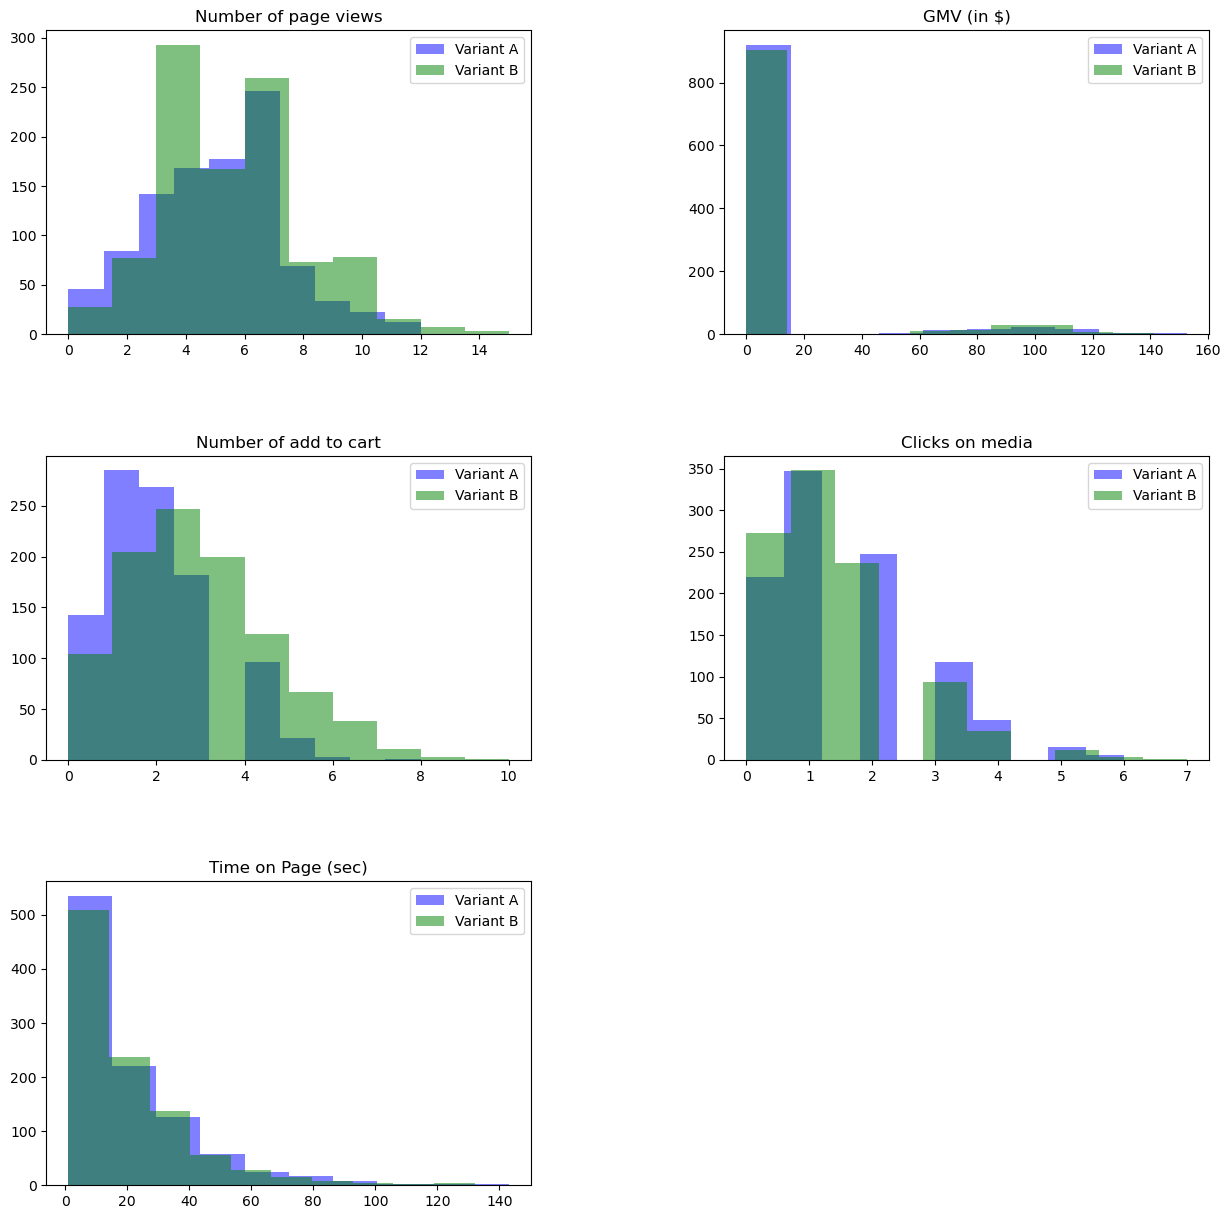

In [4]:
import matplotlib.pyplot as plt

# Define the metrics to compare
metrics_to_compare = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

# Create a figure and a set of subplots for our metrics
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Flatten the axis array for easy iteration
axs = axs.ravel()

# Define colors for each variant
colors = ['blue', 'green']

for i, metric in enumerate(metrics_to_compare):
    # Filter data for each variant
    variant_a = data[data['Variant'] == 'A'][metric]
    variant_b = data[data['Variant'] == 'B'][metric]

    # Create histogram for each variant in the same subplot
    axs[i].hist(variant_a, alpha=0.5, color=colors[0], label='Variant A')
    axs[i].hist(variant_b, alpha=0.5, color=colors[1], label='Variant B')
    axs[i].set_title(metric)
    axs[i].legend(loc='upper right')

# Remove the last subplot if there's an odd number of metrics
if len(axs) > len(metrics_to_compare):
    fig.delaxes(axs[-1])

plt.show()
